# **Project 3: Waze Churn Prediction**

### Group 8

**Group Members:**
- Kevin Obote - 190696
- Faith Nyaboke - 192745
- Grace Munyi - 054879
- Victor Radeny - 119368


![Waze app on iPhone in car](https://cdn.mos.cms.futurecdn.net/DhRFU6Ujh8Y7q9JEkESMk5-970-80.jpg.webp)
*Image credit: Shutterstock*.


## Introduction

Waze’s free navigation app makes it easier for drivers around the world to get to where they want to go. The app's community of map editors, beta testers, translators, partners, and users helps make each drive better and safer. This project is part of a larger effort at Waze to increase growth and enhance user retention.

Typically, high retention rates indicate satisfied users who repeatedly use the Waze app over time. Developing a churn prediction model will help prevent churn, improve user retention, and grow Waze’s business. By identifying users at risk of churning, Waze can implement targeted interventions to keep users engaged and satisfied.

The dataset used for this project contains 14,999 rows, each representing a unique user, and 13 columns with various features related to user activity and engagement. The aim is to analyze this data, build a predictive model for churn, and provide actionable insights to improve user retention.

### Class Walkthrough

This section contains most of the practice and lesson learnt in class, including the use of pandas, numpy, function, sets, dictionary, tuples in handling the waze dataset.

In [1]:
# Import pandas library
import pandas as pd
import numpy as np

In [2]:
# Load Waze dataset into dataframe
waze = pd.read_csv('waze_dataset.csv')

In [3]:
# By applying method, show first 7 rows in dataframe
waze.head(n=7)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone


In [4]:
# By applying method, show summary information about the dataframe

waze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [5]:
# By applying attribute, check the list of column labels in dataframe
waze.columns


Index(['ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')

In [6]:
# By applying attribute, show tuple representing dimensionality 
# (number of rows and columns) of the dataframe

waze.shape

(14999, 13)

In [7]:
# By applying attribute, show from 1st to 3rd rows (ID 0-2)
# You can use either iloc or loc

# waze_df.loc[0:2, :]
waze.iloc[0:3, :]


,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android


In [8]:
# Show 'ID', 'activity_days', and 'device' of 100th to 103th row
# You can use either iloc or loc

waze.loc[100:103, ['ID', 'activity_days', 'device']]

# waze_df.iloc[100:104, [0, 10, 12]]

,ID,activity_days,device
100,100,2,iPhone
101,101,6,iPhone
102,102,0,iPhone
103,103,21,iPhone


In [9]:
# Show the total_sessions of 12000th row
# You can use either iloc or loc

# waze_df.loc[12000, 'total_sessions']

waze.iloc[12000, 4]

52.53017243

In [10]:
# Add a new column 'percent_days_active' which is computed by: (activity_days/n_days_after_onboarding)*100 to dataframe
# to show the percentage of acticity days realtive to number of days since onboarding.
# Then show first 5 rows of dataframe.

waze['percent_days_active'] = (waze['activity_days'] / waze['n_days_after_onboarding']) * 100
waze.head(n=5)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,percent_days_active
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,1.230228
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1.061224
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,0.528103
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,46.666667
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,1.728553


In [11]:
# Using for loops

# Print the first 3 rows of the dataset
for i in range(3):
    print(waze.iloc[i])


ID                                   0
label                         retained
sessions                           283
drives                             226
total_sessions              296.748273
n_days_after_onboarding           2276
total_navigations_fav1             208
total_navigations_fav2               0
driven_km_drives           2628.845068
duration_minutes_drives    1985.775061
activity_days                       28
driving_days                        19
device                         Android
percent_days_active           1.230228
Name: 0, dtype: object
ID                                   1
label                         retained
sessions                           133
drives                             107
total_sessions              326.896596
n_days_after_onboarding           1225
total_navigations_fav1              19
total_navigations_fav2              64
driven_km_drives           13715.92055
duration_minutes_drives    3160.472914
activity_days                       13
dr

In [12]:
# List of column names
columns = waze.columns.tolist()
print(columns)


['ID', 'label', 'sessions', 'drives', 'total_sessions', 'n_days_after_onboarding', 'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives', 'activity_days', 'driving_days', 'device', 'percent_days_active']


In [13]:
# Tuple of basic statistics
basic_stats = (waze['sessions'].mean(), waze['sessions'].median(), waze['sessions'].std())
print(basic_stats)


(80.633775585039, 56.0, 80.69906484688346)


In [14]:
# Calculate basic statistics using NumPy
def calculate_statistics(df, column):
    values = df[column].to_numpy()
    stats = {
        'mean': np.mean(values),
        'median': np.median(values),
        'std_dev': np.std(values)
    }
    return stats

# Dictionary of statistics for multiple columns
stats_dict = {col: calculate_statistics(waze, col) for col in ['sessions', 'drives']}
print(stats_dict)


{'sessions': {'mean': 80.633775585039, 'median': 56.0, 'std_dev': 80.6963746538719}, 'drives': {'mean': 67.28115207680511, 'median': 48.0, 'std_dev': 65.91167510672014}}


In [15]:
# Unique devices used
devices = set(waze['device'])
print(devices)

{'Android', 'iPhone'}


## Waze Project EDA

![](https://lh6.googleusercontent.com/zdh3qDD2RCGEGL6VEkiwEq7rXq_oYDJHf70oIQRhKvqjrYlulpRNh90cmDcZtH8M1imJrl8A-wv_6E0YZSS3tpfMKX9ieac2bM3FyQeMFS5WowJkj2e_qJvRAfxUl_jA8yeWtdl9-FQhw2EBlye-Jaw) 
*Image credit: Khuta, K. (2023, June 15). How to develop an app like Waze: process, features & costs. Volpis. https://volpis.com/blog/how-to-develop-app-like-waze/*.


### Step 0: Importing required Libraries

In [16]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Load Data and Understanding the Data

In [17]:
# Load the dataset using Pandas
waze = pd.read_csv('waze_dataset.csv')

# Get the first 3 values of the dataset
waze.head(n=3)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android


In [18]:
# Get the columns of the dataset
waze.columns

Index(['ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')

In [19]:
# Get the information
waze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [20]:
# Get the Summary Statistics for Numerical values
waze.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14999.0,7499.000000,4329.982679,0.000000,3749.500000,7499.000000,11248.500000,14998.000000
sessions,14999.0,80.633776,80.699065,0.000000,23.000000,56.000000,112.000000,743.000000
drives,14999.0,67.281152,65.913872,0.000000,20.000000,48.000000,93.000000,596.000000
total_sessions,14999.0,189.964447,136.405128,0.220211,90.661156,159.568115,254.192341,1216.154633
n_days_after_onboarding,14999.0,1749.837789,1008.513876,4.000000,878.000000,1741.000000,2623.500000,3500.000000
total_navigations_fav1,14999.0,121.605974,148.121544,0.000000,9.000000,71.000000,178.000000,1236.000000
total_navigations_fav2,14999.0,29.672512,45.394651,0.000000,0.000000,9.000000,43.000000,415.000000
driven_km_drives,14999.0,4039.340921,2502.149334,60.441250,2212.600607,3493.858085,5289.861262,21183.401890
duration_minutes_drives,14999.0,1860.976012,1446.702288,18.282082,835.996260,1478.249859,2464.362632,15851.727160
activity_days,14999.0,15.537102,9.004655,0.000000,8.000000,16.000000,23.000000,31.000000


### Step 3: Exploratory Data Analysis

In [21]:
# Check for missing values in the dataset
missing_values = waze.isnull().sum()

# Display columns with missing values
print("Missing values before imputation:\n", missing_values)

Missing values before imputation:
 ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64


We can see that we have 700 missing values in Labels

In [22]:
# Impute missing values in the 'label' column with the mode
mode_value = waze['label'].mode()[0]
waze['label'] = waze['label'].fillna(mode_value)


In [23]:
# Verify missing values are handled
missing_values_after = waze.isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

Missing values after imputation:
 ID                         0
label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64


In [24]:
# Check for duplicate rows
duplicate_rows = waze.duplicated().sum()
print(f'Duplicate rows: {duplicate_rows}')

Duplicate rows: 0


### Plot histograms for numerical features


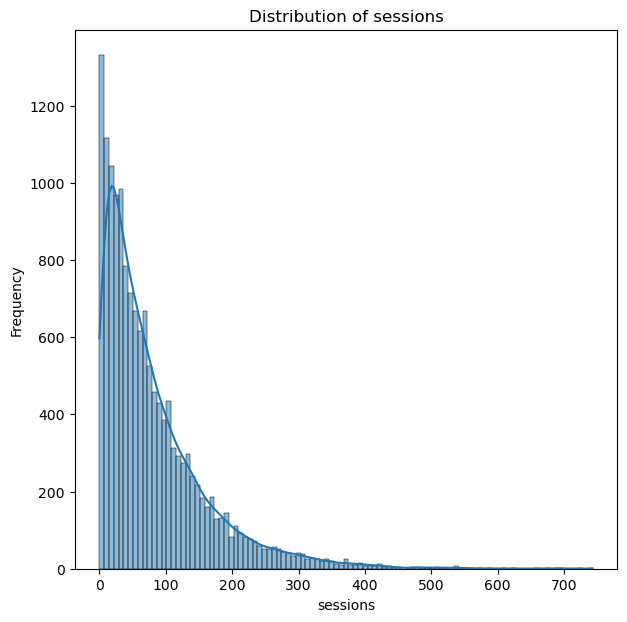

In [25]:
# Distribution of sessions
plt.figure(figsize=(7, 7))
sns.histplot(waze['sessions'], kde=True)
plt.title('Distribution of sessions')
plt.xlabel('sessions')
plt.ylabel('Frequency')
plt.show()


### Histogram for 'sessions'

This histogram represents the distribution of the number of sessions per user in the Waze dataset. Here's a detailed explanation:

1. **X-Axis (Sessions)**:
    - The x-axis represents the number of sessions that users have logged. Each bar corresponds to a range of session counts.

2. **Y-Axis (Frequency)**:
    - The y-axis represents the frequency, i.e., the number of users that fall within each session count range.

3. **Distribution Shape**:
    - The histogram shows a right-skewed distribution (also known as a positively skewed distribution). This means that the majority of users have a relatively low number of sessions, and as the number of sessions increases, the frequency of users decreases.

4. **Central Tendency**:
    - The peak of the histogram (mode) is at the lower end, indicating that many users have a small number of sessions. 

5. **Spread**:
    - The spread of the data extends towards the higher end, but with significantly lower frequencies. There are a few users with a high number of sessions, but they are much less common.

6. **KDE Plot**:
    - The blue line represents the Kernel Density Estimate (KDE), which is a smoothed version of the histogram. It helps in understanding the distribution pattern more clearly.

### Interpretation

- **User Engagement**:
    - The majority of users engage with the Waze app for a small number of sessions. This could imply that while many users try the app, fewer users continue to use it extensively.
    
- **Retention Efforts**:
    - For retention strategies, it's crucial to focus on the users with low session counts to understand why they are not using the app more frequently. Targeted interventions can be designed to increase their engagement.

- **Business Insights**:
    - The long tail of users with high session counts indicates a small but highly engaged user base. These users could be very valuable and worth focusing on for premium features, advertisements, or other monetization strategies.

### Next Steps

- **Analyze Users with Low Sessions**:
    - Further analysis could be performed to understand the characteristics of users with low session counts. Are they new users? Do they have specific patterns in their usage?

- **Identify Retention Strategies**:
    - Identify strategies that can help convert users with low sessions into more frequent users. This could include personalized notifications, improving user onboarding, or offering incentives for regular use.

- **Understand High Engagement Users**:
    - Examine the features and behaviors of highly engaged users to replicate these for users with lower engagement. Understanding what drives their high usage can provide insights for improving overall retention.


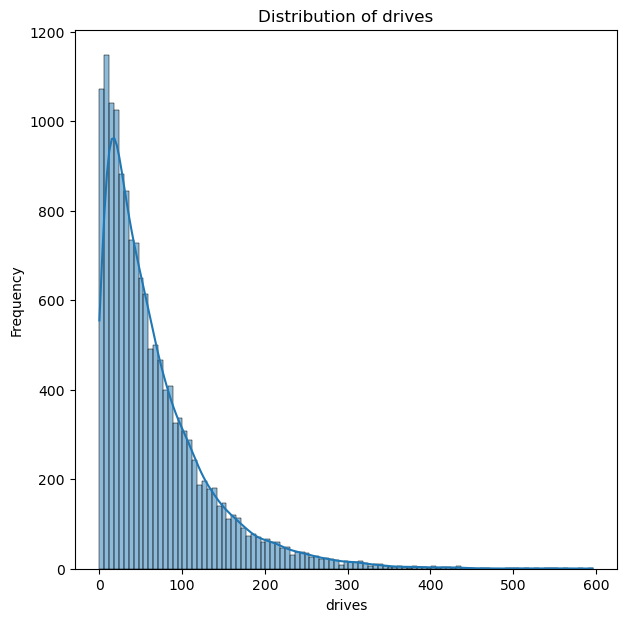

In [26]:
# Distribution of drives
plt.figure(figsize=(7, 7))
sns.histplot(waze['drives'], kde=True)
plt.title('Distribution of drives')
plt.xlabel('drives')
plt.ylabel('Frequency')
plt.show()


### Histogram for 'drives'

This histogram represents the distribution of the number of drives per user in the Waze dataset. Here's a detailed explanation:

1. **X-Axis (Drives)**:
    - The x-axis represents the number of drives that users have logged. Each bar corresponds to a range of drive counts.

2. **Y-Axis (Frequency)**:
    - The y-axis represents the frequency, i.e., the number of users that fall within each drive count range.

3. **Distribution Shape**:
    - The histogram shows a right-skewed distribution (positively skewed). This means that most users have a relatively low number of drives, and as the number of drives increases, the frequency of users decreases.

4. **Central Tendency**:
    - The peak of the histogram (mode) is at the lower end, indicating that many users have a small number of drives.

5. **Spread**:
    - The spread of the data extends towards the higher end, but with significantly lower frequencies. There are a few users with a high number of drives, but they are much less common.

6. **KDE Plot**:
    - The blue line represents the Kernel Density Estimate (KDE), which is a smoothed version of the histogram. It helps in understanding the distribution pattern more clearly.

### Interpretation

- **User Engagement**:
    - Similar to the 'sessions' histogram, the majority of users engage with the Waze app for a small number of drives. This indicates that while many users use the app for driving, fewer users drive frequently.

- **Retention Efforts**:
    - For retention strategies, it's crucial to focus on the users with low drive counts to understand why they are not using the driving feature more frequently. Targeted interventions can be designed to increase their engagement.

- **Business Insights**:
    - The long tail of users with high drive counts indicates a small but highly engaged user base. These users could be very valuable and worth focusing on for premium features, advertisements, or other monetization strategies.

### Next Steps

- **Analyze Users with Low Drives**:
    - Further analysis could be performed to understand the characteristics of users with low drive counts. Are they new users? Do they have specific patterns in their usage?

- **Identify Retention Strategies**:
    - Identify strategies that can help convert users with low drives into more frequent users. This could include personalized notifications, improving user onboarding, or offering incentives for regular use.

- **Understand High Engagement Users**:
    - Examine the features and behaviors of highly engaged users to replicate these for users with lower engagement. Understanding what drives their high usage can provide insights for improving overall retention.


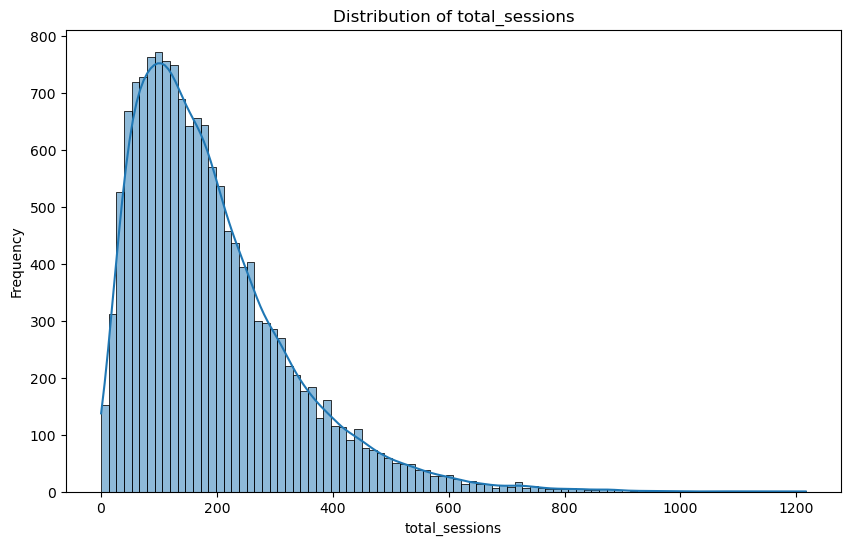

In [27]:
# Distribution of total_sessions
plt.figure(figsize=(10, 6))
sns.histplot(waze['total_sessions'], kde=True)
plt.title('Distribution of total_sessions')
plt.xlabel('total_sessions')
plt.ylabel('Frequency')
plt.show()


### Histogram for 'total_sessions'

This histogram represents the distribution of the total number of sessions per user in the Waze dataset. Here's a detailed explanation:

1. **X-Axis (Total Sessions)**:
    - The x-axis represents the total number of sessions that users have logged. Each bar corresponds to a range of total session counts.

2. **Y-Axis (Frequency)**:
    - The y-axis represents the frequency, i.e., the number of users that fall within each total session count range.

3. **Distribution Shape**:
    - The histogram shows a right-skewed distribution (positively skewed). This means that most users have a relatively low total number of sessions, and as the number of total sessions increases, the frequency of users decreases.

4. **Central Tendency**:
    - The peak of the histogram (mode) is at the lower end, indicating that many users have a small number of total sessions.

5. **Spread**:
    - The spread of the data extends towards the higher end, but with significantly lower frequencies. There are a few users with a high total number of sessions, but they are much less common.

6. **KDE Plot**:
    - The blue line represents the Kernel Density Estimate (KDE), which is a smoothed version of the histogram. It helps in understanding the distribution pattern more clearly.

### Interpretation

- **User Engagement**:
    - The majority of users engage with the Waze app for a small total number of sessions. This indicates that while many users try the app, fewer users continue to use it extensively over time.

- **Retention Efforts**:
    - For retention strategies, it's crucial to focus on the users with low total session counts to understand why they are not using the app more frequently. Targeted interventions can be designed to increase their engagement.

- **Business Insights**:
    - The long tail of users with high total session counts indicates a small but highly engaged user base. These users could be very valuable and worth focusing on for premium features, advertisements, or other monetization strategies.

### Next Steps

- **Analyze Users with Low Total Sessions**:
    - Further analysis could be performed to understand the characteristics of users with low total session counts. Are they new users? Do they have specific patterns in their usage?

- **Identify Retention Strategies**:
    - Identify strategies that can help convert users with low total sessions into more frequent users. This could include personalized notifications, improving user onboarding, or offering incentives for regular use.

- **Understand High Engagement Users**:
    - Examine the features and behaviors of highly engaged users to replicate these for users with lower engagement. Understanding what drives their high usage can provide insights for improving overall retention.

This histogram provides a foundational understanding of user engagement with the Waze app, specifically looking at the total sessions logged by users. This information is crucial for developing targeted retention strategies and improving user experience.

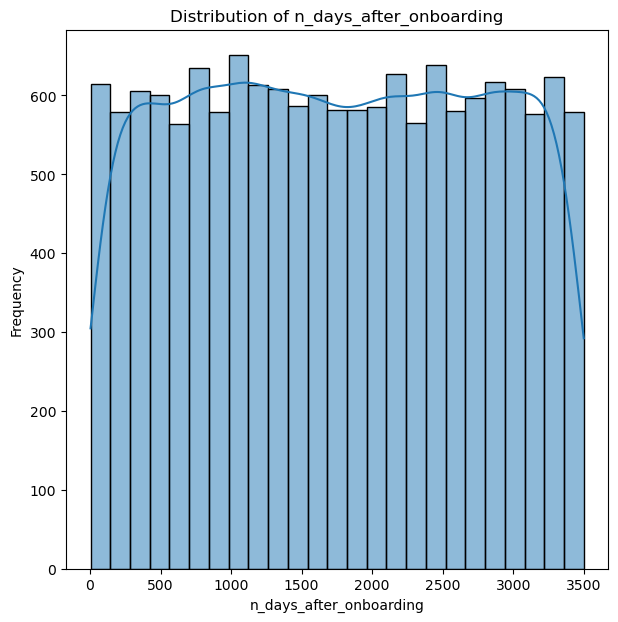

In [28]:
# Distribution of n_days_after_onboarding
plt.figure(figsize=(7, 7))
sns.histplot(waze['n_days_after_onboarding'], kde=True)
plt.title('Distribution of n_days_after_onboarding')
plt.xlabel('n_days_after_onboarding')
plt.ylabel('Frequency')
plt.show()


This histogram shows the distribution of days after onboarding. The x-axis represents the number of days since onboarding, and the y-axis represents the frequency. This visualization helps in understanding user retention over time.

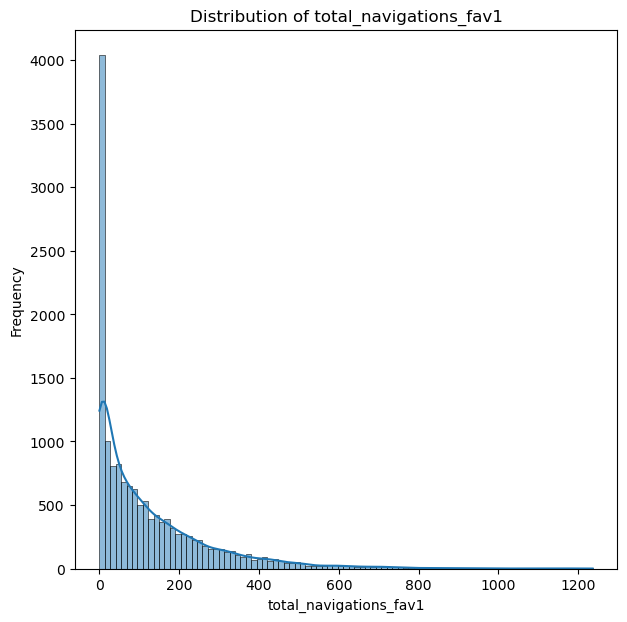

In [29]:
# Distribution of total_navigations_fav1
plt.figure(figsize=(7, 7))
sns.histplot(waze['total_navigations_fav1'], kde=True)
plt.title('Distribution of total_navigations_fav1')
plt.xlabel('total_navigations_fav1')
plt.ylabel('Frequency')
plt.show()


This histogram illustrates the distribution of the number of navigations to the first favorite location. The x-axis represents the number of navigations, and the y-axis shows the frequency. This plot provides insights into how often users navigate to their favorite locations.

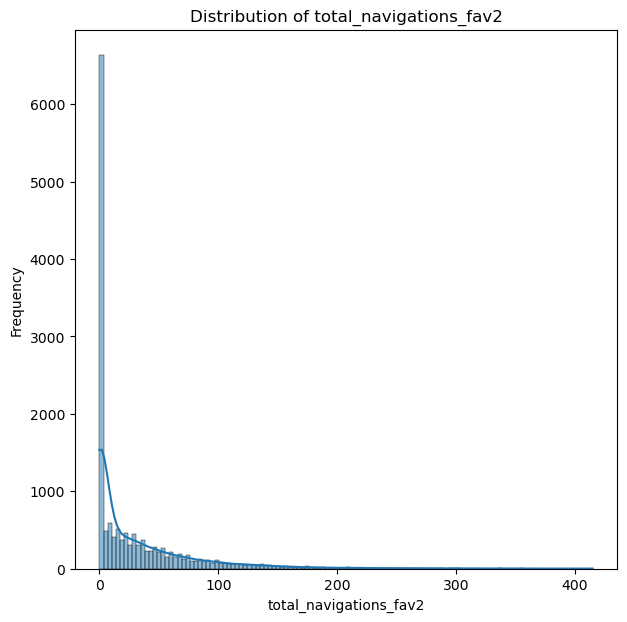

In [30]:
# Distribution of total_navigations_fav2
plt.figure(figsize=(7, 7))
sns.histplot(waze['total_navigations_fav2'], kde=True)
plt.title('Distribution of total_navigations_fav2')
plt.xlabel('total_navigations_fav2')
plt.ylabel('Frequency')
plt.show()


Similar to the previous plot, this histogram shows the distribution of the number of navigations to the second favorite location. The x-axis represents the number of navigations, and the y-axis shows the frequency.

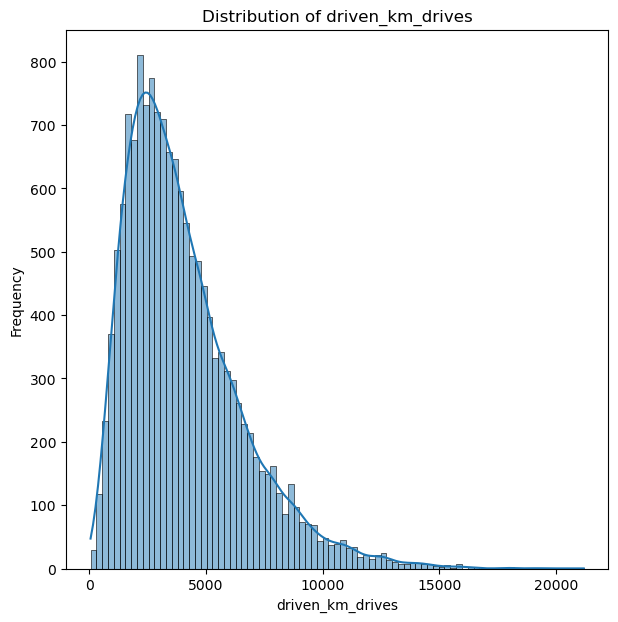

In [31]:
# Distribution of driven_km_drives
plt.figure(figsize=(7, 7))
sns.histplot(waze['driven_km_drives'], kde=True)
plt.title('Distribution of driven_km_drives')
plt.xlabel('driven_km_drives')
plt.ylabel('Frequency')
plt.show()


This histogram depicts the distribution of kilometers driven per drive. The x-axis represents the kilometers driven, and the y-axis represents the frequency. This plot provides insights into the distance users are driving.

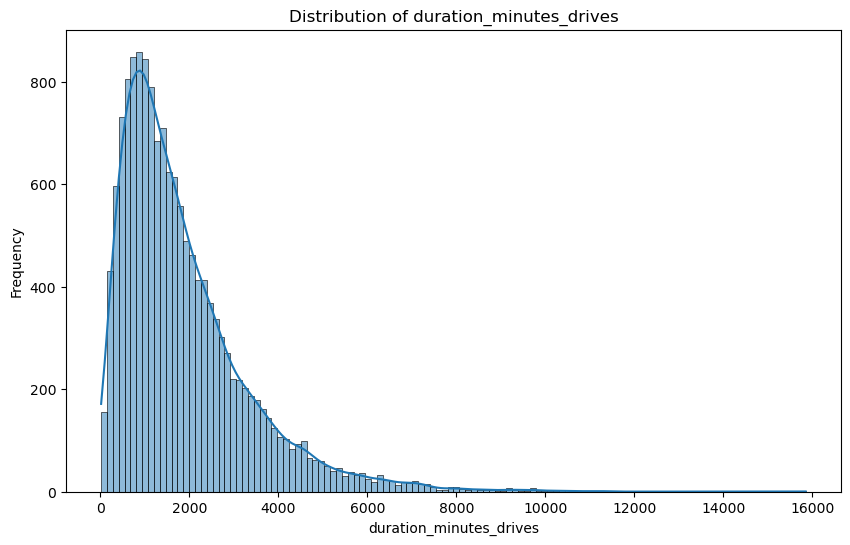

In [32]:
# Distribution of duration_minutes_drives
plt.figure(figsize=(10, 6))
sns.histplot(waze['duration_minutes_drives'], kde=True)
plt.title('Distribution of duration_minutes_drives')
plt.xlabel('duration_minutes_drives')
plt.ylabel('Frequency')
plt.show()


This histogram illustrates the distribution of the duration of drives in minutes. The x-axis represents the duration in minutes, and the y-axis shows the frequency. This plot helps in understanding how long users are driving.

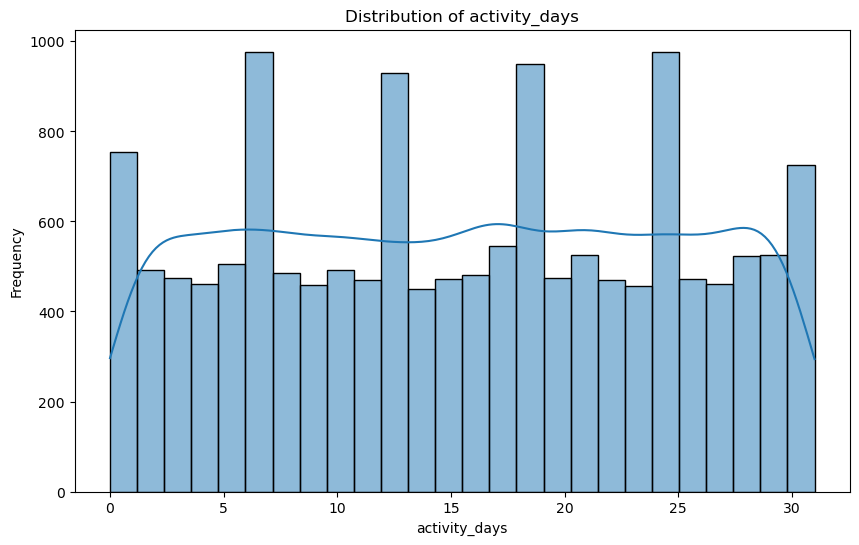

In [33]:
# Distribution of activity_days
plt.figure(figsize=(10, 6))
sns.histplot(waze['activity_days'], kde=True)
plt.title('Distribution of activity_days')
plt.xlabel('activity_days')
plt.ylabel('Frequency')
plt.show()


This histogram shows the distribution of the number of active days. The x-axis represents the number of active days, and the y-axis represents the frequency. This plot provides insights into user activity levels.

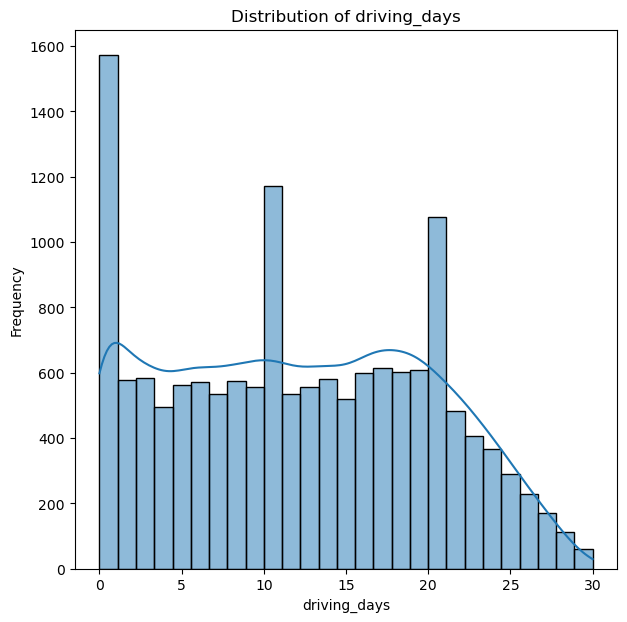

In [34]:
# Distribution of driving_days
plt.figure(figsize=(7, 7))
sns.histplot(waze['driving_days'], kde=True)
plt.title('Distribution of driving_days')
plt.xlabel('driving_days')
plt.ylabel('Frequency')
plt.show()


This histogram illustrates the distribution of the number of driving days. The x-axis represents the number of driving days, and the y-axis shows the frequency. This plot helps in understanding how frequently users are driving.

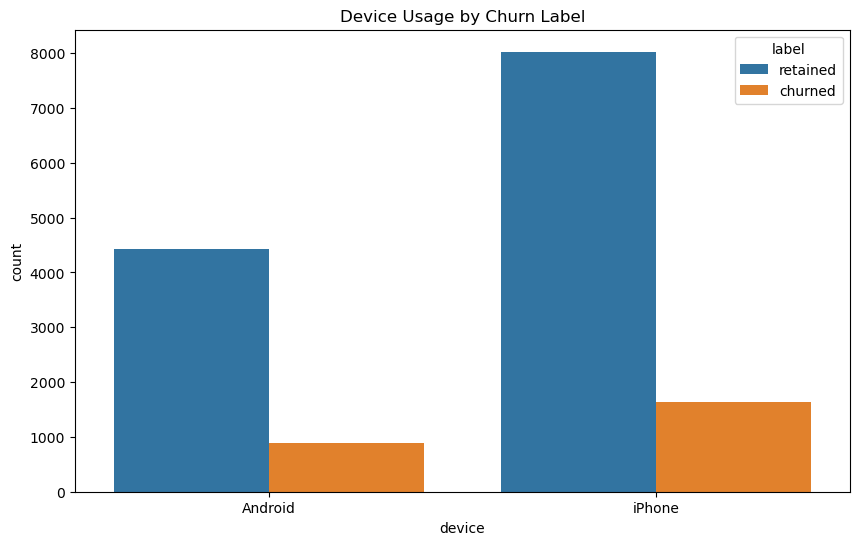

In [35]:
# Bar plot for device usage
plt.figure(figsize=(10, 6))
sns.countplot(x='device', hue='label', data=waze)
plt.title('Device Usage by Churn Label')
plt.show()

We can see that we have a high retention and churn from the iPhone device users

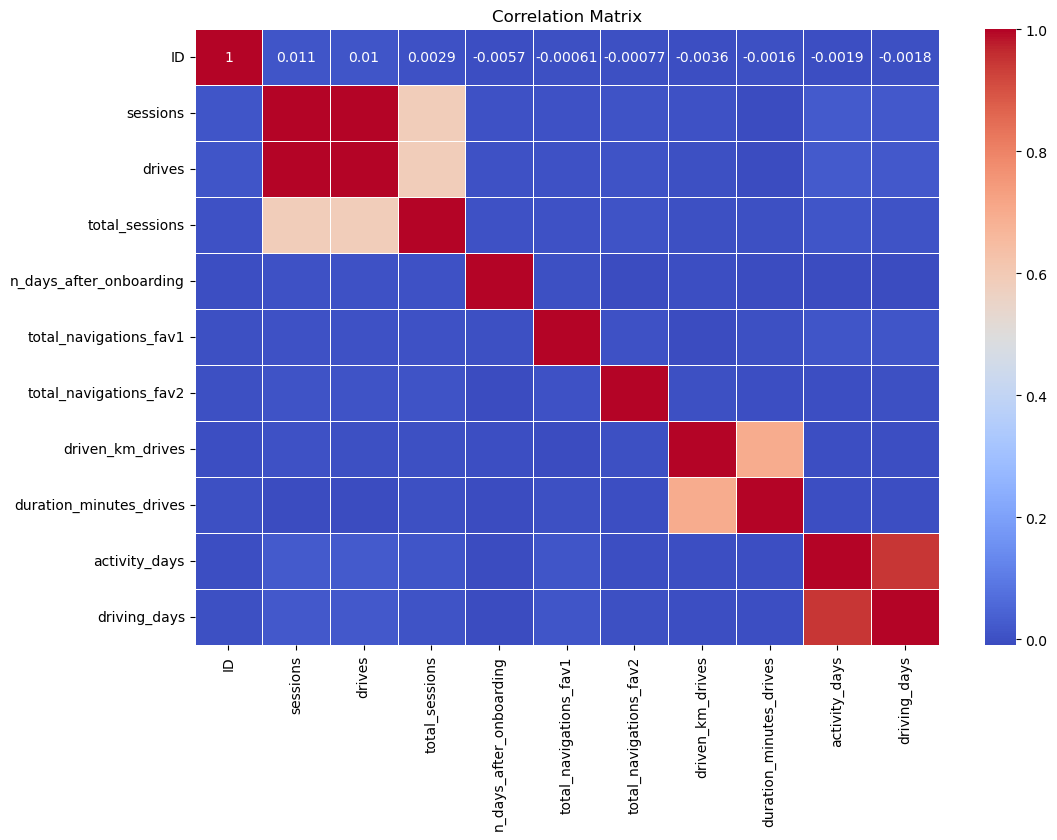

In [36]:
# Compute correlation matrix
numeric_df = waze.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()


# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

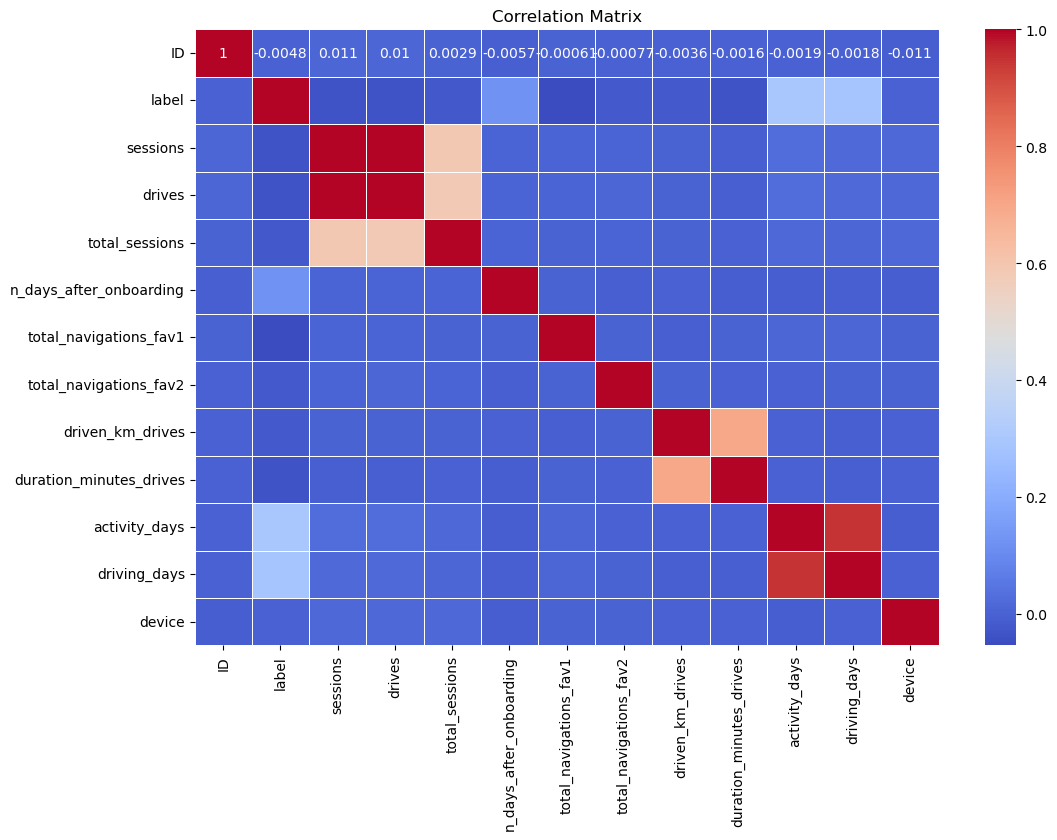

In [37]:
# Converting non-numeric values using Labelencoder to include both object, float and int
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in waze.select_dtypes(include=[object]).columns:
    waze[column] = le.fit_transform(waze[column])

# Compute correlation matrix
correlation_matrix = waze.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


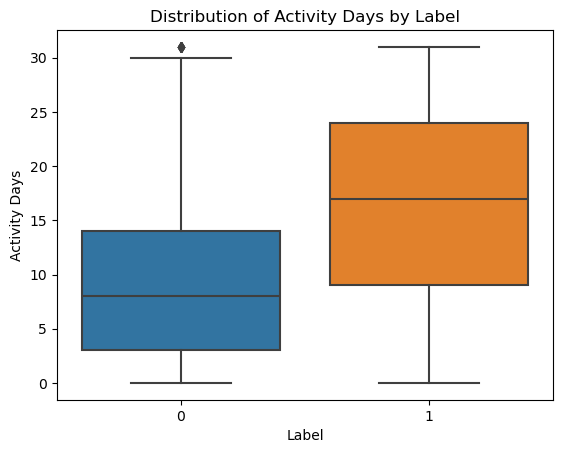

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of activity_days vs label
sns.boxplot(x='label', y='activity_days', data=waze)

# Add labels and title for clarity
plt.xlabel('Label')
plt.ylabel('Activity Days')
plt.title('Distribution of Activity Days by Label')

# Show the plot
plt.show()


In [39]:
# Create a new feature for total navigation activities
waze['total_navigation'] = waze['total_navigations_fav1'] + waze['total_navigations_fav2']

In [40]:
waze.head(n=3)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,total_navigation
0,0,1,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,0,208
1,1,1,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,1,83
2,2,1,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,0,0


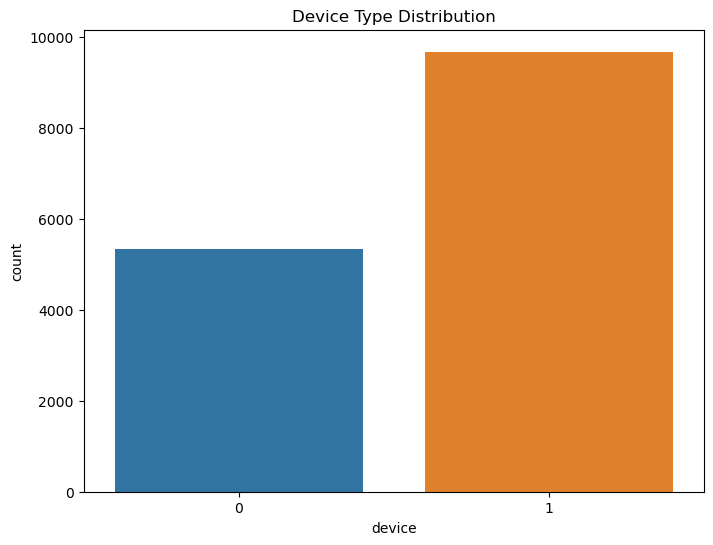

In [41]:
# Plot device type distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='device', data=waze)
plt.title('Device Type Distribution')
plt.show()

Here we can see that we have more iPhone devices as compareed to Android device.

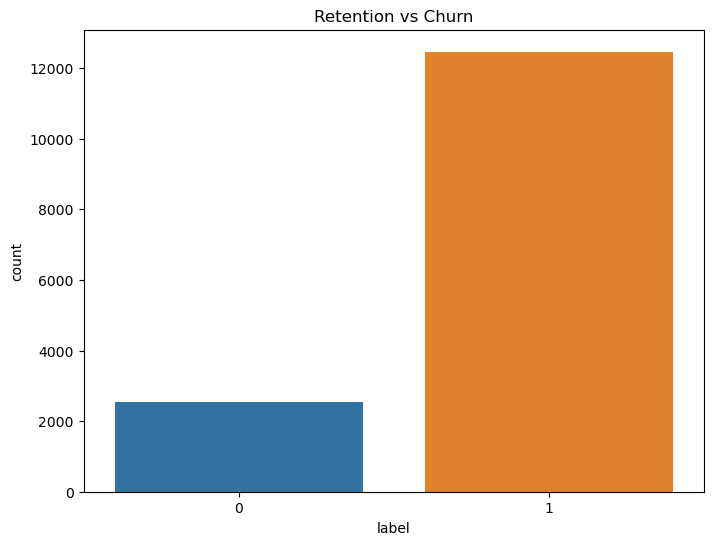

In [42]:
# Plot retention vs churn

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=waze)
plt.title('Retention vs Churn')
plt.show()


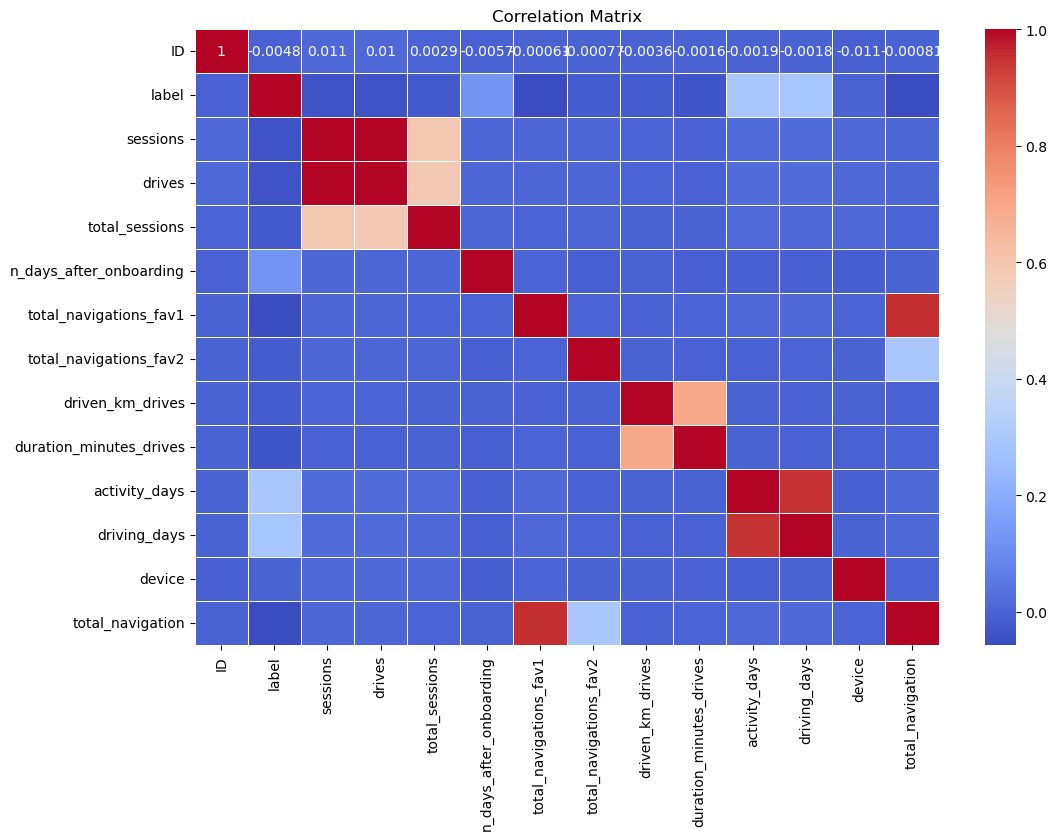

In [43]:
# Converting non-numeric values using Labelencoder to include both object, float and int
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in waze.select_dtypes(include=[object]).columns:
    waze[column] = le.fit_transform(waze[column])

# Compute correlation matrix
correlation_matrix = waze.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [44]:
correlation_matrix

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,total_navigation
ID,1.000000,-0.004777,0.011240,0.010470,0.002909,-0.005673,-0.000606,-0.000771,-0.003561,-0.001594,-0.001887,-0.001808,-0.011270,-0.000805
label,-0.004777,1.000000,-0.036923,-0.037296,-0.022915,0.124711,-0.054237,-0.019121,-0.019441,-0.035698,0.295190,0.286080,-0.003597,-0.057422
sessions,0.011240,-0.036923,1.000000,0.996822,0.589079,0.005676,0.005713,0.006185,0.002113,-0.006113,0.024194,0.018973,0.012443,0.007269
drives,0.010470,-0.037296,0.996822,1.000000,0.586741,0.005216,0.005017,0.007572,0.001883,-0.005855,0.024043,0.018847,0.011815,0.007011
total_sessions,0.002909,-0.022915,0.589079,0.586741,1.000000,0.004731,0.002137,0.006421,-0.000416,-0.001689,0.013449,0.009912,0.011665,0.003922
n_days_after_onboarding,-0.005673,0.124711,0.005676,0.005216,0.004731,1.000000,0.000435,-0.008075,-0.003213,-0.009646,-0.009725,-0.008563,-0.012044,-0.001949
total_navigations_fav1,-0.000606,-0.054237,0.005713,0.005017,0.002137,0.000435,1.000000,0.002306,-0.007690,0.002097,0.011066,0.010359,0.002575,0.956165
total_navigations_fav2,-0.000771,-0.019121,0.006185,0.007572,0.006421,-0.008075,0.002306,1.000000,0.000081,-0.004091,-0.004036,0.001951,-0.000069,0.295031
driven_km_drives,-0.003561,-0.019441,0.002113,0.001883,-0.000416,-0.003213,-0.007690,0.000081,1.000000,0.697866,-0.002601,-0.005487,-0.000761,-0.007324
duration_minutes_drives,-0.001594,-0.035698,-0.006113,-0.005855,-0.001689,-0.009646,0.002097,-0.004091,0.697866,1.000000,-0.002830,-0.005145,-0.004409,0.000806


In [45]:


# Convert 'label' to a binary target variable
waze['target'] = waze['label'].apply(lambda x: 0 if x == 'retained' else 1)

# Drop non-numeric columns
waze_numeric = waze.drop(columns=['ID', 'label', 'device'])

# Compute correlations
correlation_matrix = waze_numeric.corr()
target_correlation = correlation_matrix['target'].sort_values(ascending=False)

print(target_correlation)

sessions                  NaN
drives                    NaN
total_sessions            NaN
n_days_after_onboarding   NaN
total_navigations_fav1    NaN
total_navigations_fav2    NaN
driven_km_drives          NaN
duration_minutes_drives   NaN
activity_days             NaN
driving_days              NaN
total_navigation          NaN
target                    NaN
Name: target, dtype: float64


In [46]:
waze.head(3)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,total_navigation,target
0,0,1,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,0,208,1
1,1,1,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,1,83,1
2,2,1,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,0,0,1


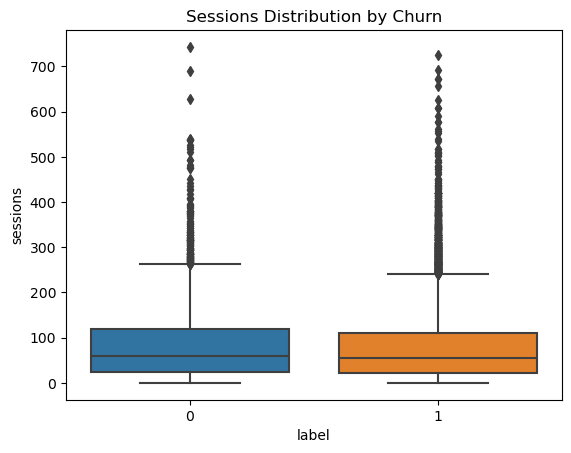

In [47]:
# Visualize feature distributions by churn
sns.boxplot(data=waze, x='label', y='sessions')
plt.title('Sessions Distribution by Churn')
plt.show()

In [48]:
# Group by label and calculate mean for numerical features
waze.groupby('label').mean()


,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,total_navigation,target
label,,,,,,,,,,,,,,
0,7544.852918,87.238959,72.730678,196.893424,1471.027603,139.414826,31.596609,4147.171864,1975.459630,9.644716,7.218060,0.648659,171.011435,1.0
1,7489.669742,79.289738,66.172270,188.554523,1806.570729,117.982187,29.280992,4017.399232,1837.680621,16.736099,13.189521,0.644066,147.263179,1.0


In [49]:
# Encode label as 1 for retained and 0 for churned
waze['label_encoded'] = waze['label'].apply(lambda x: 1 if x == 'retained' else 0)

# Calculate correlation
waze.corr()['label_encoded'].sort_values(ascending=False)


ID                        NaN
label                     NaN
sessions                  NaN
drives                    NaN
total_sessions            NaN
n_days_after_onboarding   NaN
total_navigations_fav1    NaN
total_navigations_fav2    NaN
driven_km_drives          NaN
duration_minutes_drives   NaN
activity_days             NaN
driving_days              NaN
device                    NaN
total_navigation          NaN
target                    NaN
label_encoded             NaN
Name: label_encoded, dtype: float64

In [50]:
# Cross-tabulate device type with label
pd.crosstab(waze['device'], ['label'], normalize='index')


col_0,label
device,
0,1.0
1,1.0


In [51]:
waze.dtypes

ID                           int64
label                        int32
sessions                     int64
drives                       int64
total_sessions             float64
n_days_after_onboarding      int64
total_navigations_fav1       int64
total_navigations_fav2       int64
driven_km_drives           float64
duration_minutes_drives    float64
activity_days                int64
driving_days                 int64
device                       int32
total_navigation             int64
target                       int64
label_encoded                int64
dtype: object

In [52]:
# Option 1: Fill missing values with the mean (or another value)
waze.fillna(waze.mean(), inplace=True)

# Option 2: Drop rows with missing values
waze.dropna(inplace=True)


In [53]:
# Check for non-numeric values in the 'sessions' column, for example
print(waze['sessions'].unique())

# You can do this for other columns as well


[283 133 114  49  84 113   3  39  57  23 125  51  80  72  30 272  48 106
  52 148  73  29   0 132   5  64  78  46  38 291 126 156  75  16  95  91
 105  20 165  26  25  62   7  67   4  12 150  41  44  43  69 253  36 248
  89 142  63  54  97 116  22  18 306  35 117  17 305  34 122  76  37 139
  66  56  40  79  42 192  31 402  15 138  33 237 141 175 222  32  45  53
 231 130 219 260  14 161 190 127 143 140 266 218  11  70 123  55 158 181
   2  47  13  71  27  83 108 147 351  28 118  58 198  24 134 131 185   1
   9 136 239 120 293  10  94 103 263 229  68 226  98  19  21 245 172 170
 119 199 189 183   6 209  85  82 333 207 275 115 102 145   8 121  90  87
 194  65 251 186  96 164  60 249 100 187 129 256  74 111  50 370 159 476
 153  61 338 104  81  77 332 124 146  92 250 163 171 151 128  86 421 246
 200 180 166 169 188 184 215  88 344 112 354 109 191 213 135 286 310 110
 342 328 202  99 387 179 270 400 315 268 267 274 101 285 419 206 307 144
 157 341 517 536 205 152 279 107  93 281 162 350 26

In [54]:
numeric_columns = [
    'sessions', 'drives', 'total_sessions', 'n_days_after_onboarding',
    'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives',
    'duration_minutes_drives', 'activity_days', 'driving_days'
]

for column in numeric_columns:
    waze[column] = pd.to_numeric(waze[column], errors='coerce')


In [55]:
# Check for NaN values
print(waze.isna().sum())

# Option 1: Fill NaN with the mean of the column
waze.fillna(waze.mean(), inplace=True)

# Option 2: Drop rows with NaN values
waze.dropna(inplace=True)


ID                         0
label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
total_navigation           0
target                     0
label_encoded              0
dtype: int64


We can see we have a higher retention frequency as compared to churned

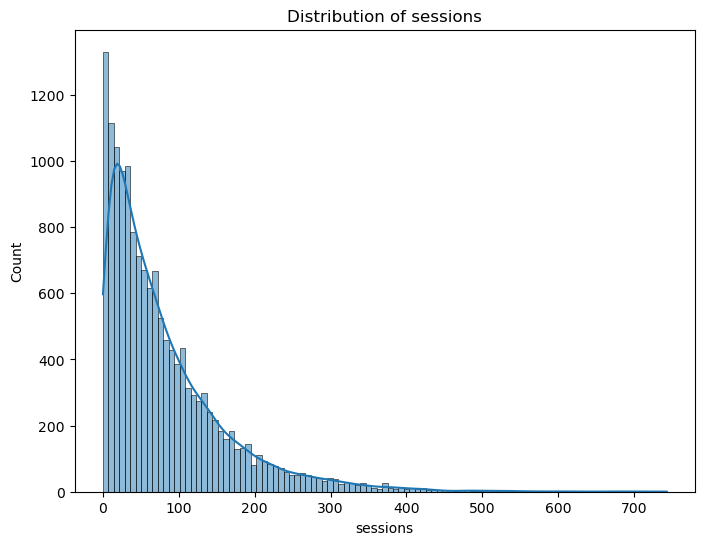

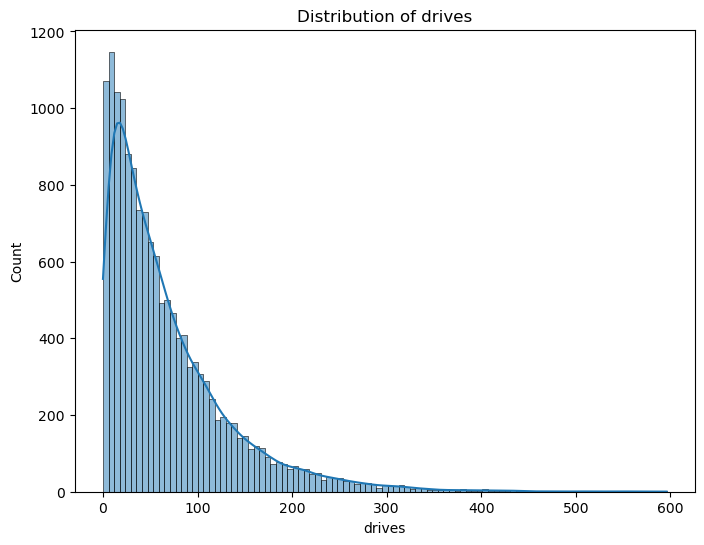

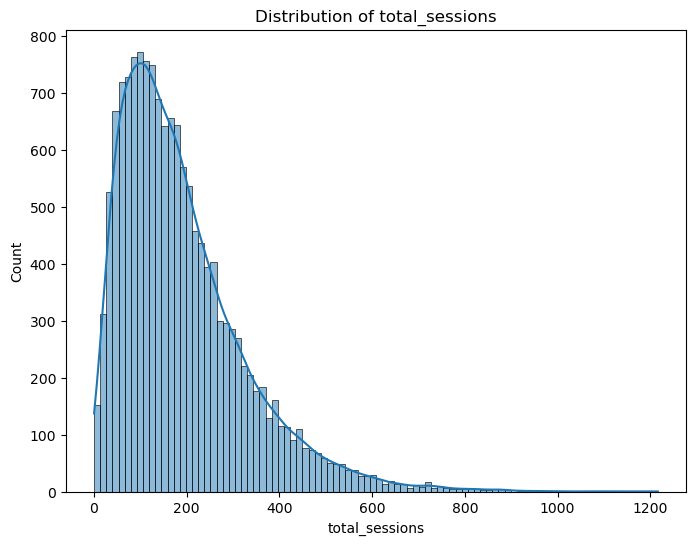

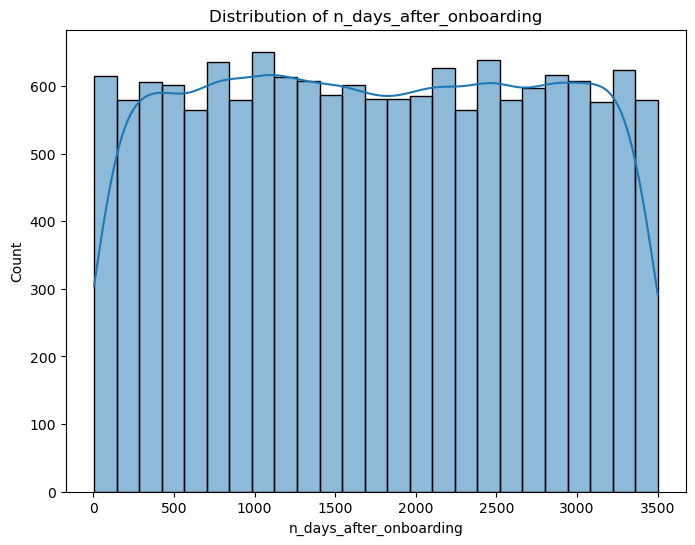

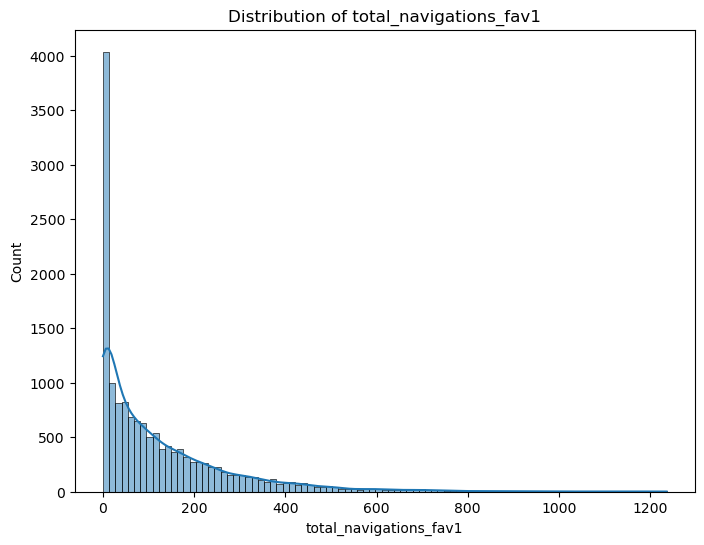

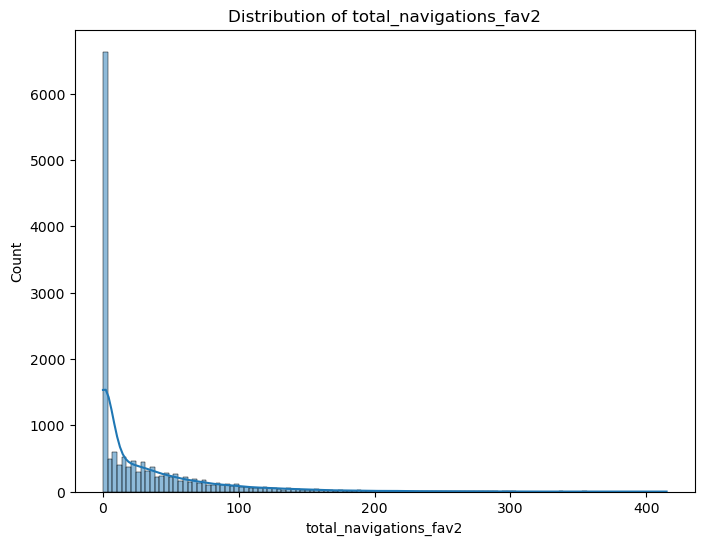

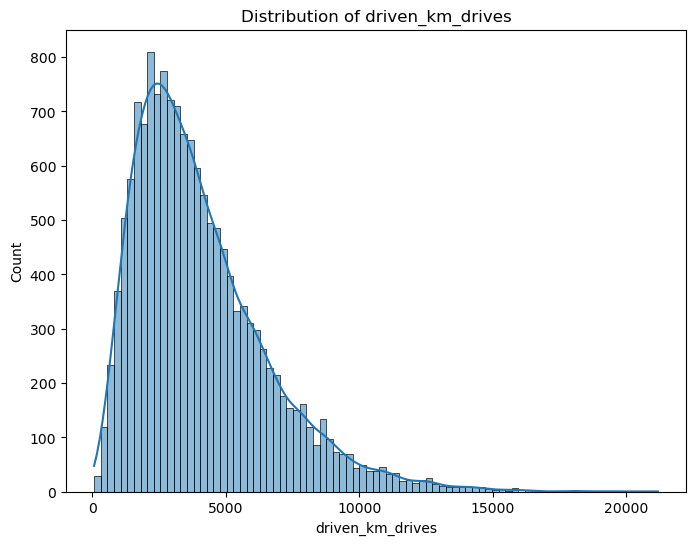

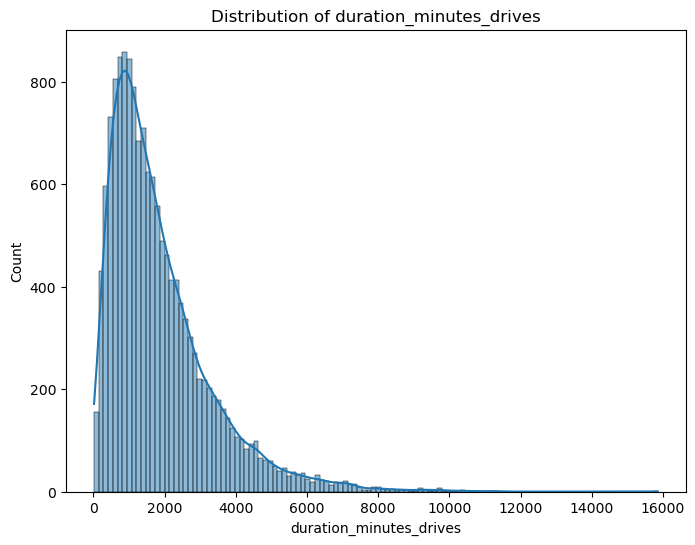

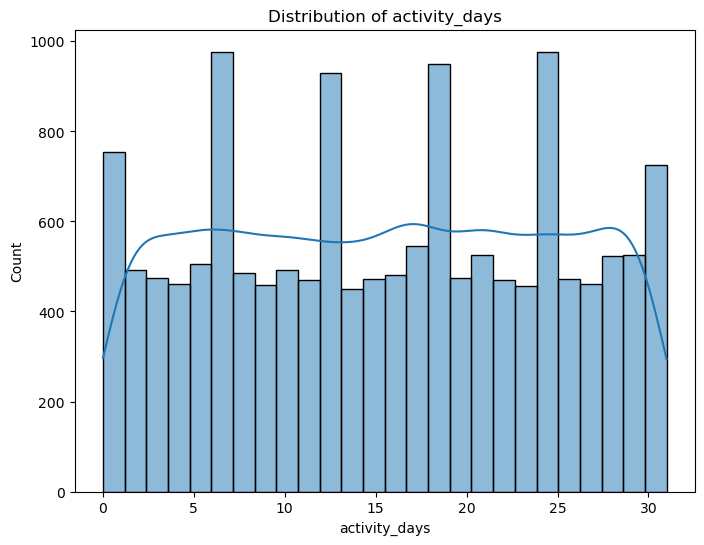

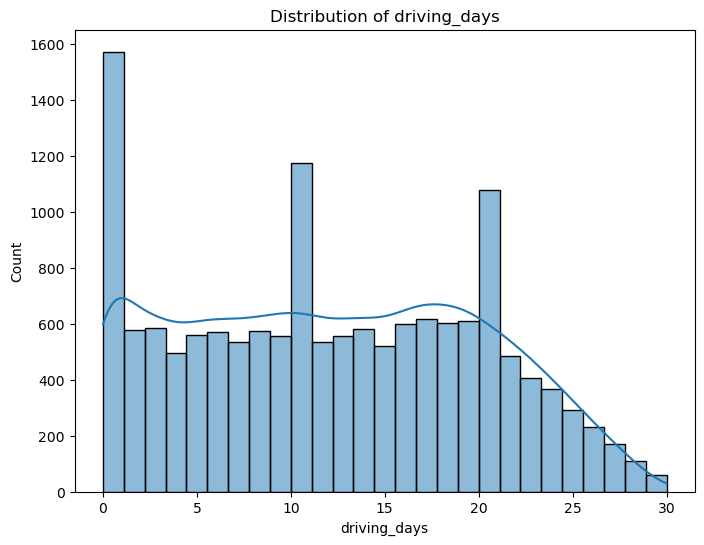

In [56]:
# Plot distribution of numerical features
# Preparing a list of numerical features

numerical_features = ['sessions', 'drives', 'total_sessions', 'n_days_after_onboarding',
                      'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives',
                      'duration_minutes_drives', 'activity_days', 'driving_days']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(waze[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

## Step 4: Feature Engineering

In [57]:
# Create new features using other features

# Creating a new feature sessions_per_day
waze['sessions_per_day'] = waze['total_sessions'] / waze['n_days_after_onboarding']

# Creating a new feature avg_km_per_drive
waze['avg_km_per_drive'] = waze['driven_km_drives'] / waze['drives']


In [58]:
# Check if the new features have been created
waze.columns

Index(['ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device', 'total_navigation', 'target',
       'label_encoded', 'sessions_per_day', 'avg_km_per_drive'],
      dtype='object')

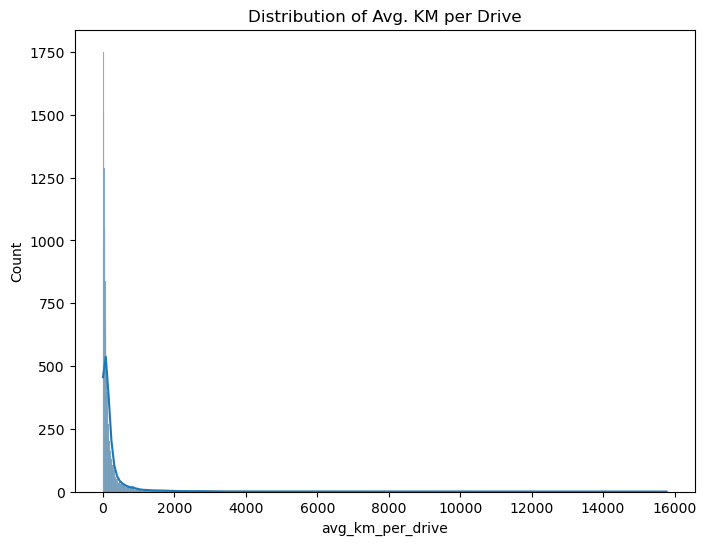

In [59]:
# Plot avg_km_per_drive

plt.figure(figsize=(8, 6))
sns.histplot(waze['avg_km_per_drive'], kde=True)
plt.title('Distribution of Avg. KM per Drive')
plt.show()


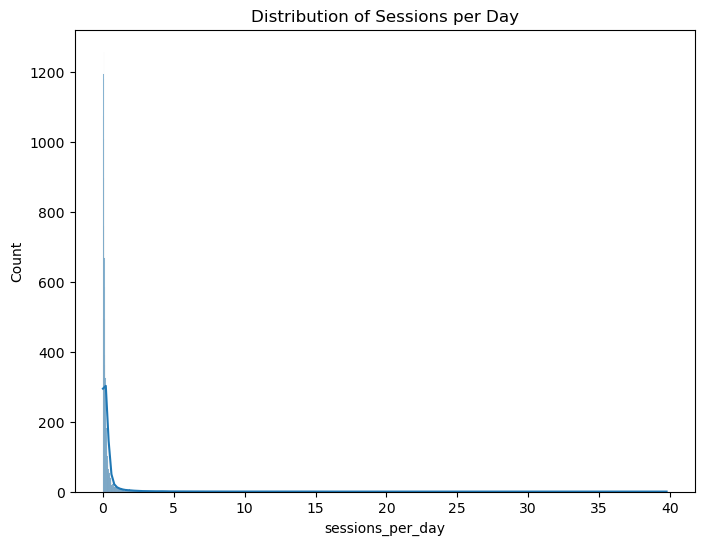

In [60]:
# Plot sessions_per_day

plt.figure(figsize=(8, 6))
sns.histplot(waze['sessions_per_day'], kde=True)
plt.title('Distribution of Sessions per Day')
plt.show()


### Conclusion and Recommendations for Waze Project EDA

#### **Conclusion**

The exploratory data analysis (EDA) of the Waze dataset reveals several key insights into user engagement and behavior. The histograms of numerical features such as 'sessions,' 'drives,' 'total_sessions,' and other related metrics consistently show right-skewed distributions. This indicates that while a majority of users engage with the app minimally, a smaller segment exhibits high engagement. The low frequency of users with a high number of sessions and drives suggests that retention and user engagement strategies need to be enhanced to convert casual users into more frequent users.

**Key Findings:**
1. **Right-Skewed Distributions:** Most users have a relatively low number of sessions and drives, with fewer users exhibiting high engagement.
2. **High Engagement Users:** A small segment of users is highly engaged, showing that while the app has a dedicated user base, overall engagement is uneven.
3. **Potential for Improvement:** There is significant potential to improve user retention by addressing the needs and behaviors of users with low engagement.

#### **Recommendations**

1. **Enhance User Retention Strategies:**
   - **Personalized Engagement:** Develop personalized notifications and in-app messages tailored to users with low session and drive counts to encourage more frequent use.
   - **Incentive Programs:** Introduce reward programs or incentives for users who reach certain engagement milestones to increase their app usage.

2. **Improve User Onboarding:**
   - **Onboarding Experience:** Optimize the onboarding process to ensure new users understand the value of the app and are encouraged to use it more frequently from the start.
   - **Feature Introduction:** Gradually introduce key features to new users to keep them engaged and interested in exploring the app’s capabilities.

3. **Analyze High Engagement Users:**
   - **Behavioral Analysis:** Perform a deeper analysis of highly engaged users to understand their behaviors and preferences. This can help in designing features and experiences that could be extended to less engaged users.
   - **Feature Usage:** Identify the features most used by high engagement users and explore ways to make these features more prominent or available to all users.

4. **Targeted Interventions:**
   - **Segmented Campaigns:** Implement targeted marketing campaigns aimed at different user segments based on their engagement levels to address specific needs and enhance overall user experience.
   - **Feedback Mechanisms:** Establish feedback mechanisms to gather insights directly from users about their experience and pain points, and use this feedback to inform improvements.

5. **Continuous Monitoring and Improvement:**
   - **Ongoing Analysis:** Regularly monitor user engagement metrics and adjust strategies based on evolving data and trends.
   - **A/B Testing:** Conduct A/B testing to evaluate the effectiveness of different engagement strategies and interventions.

By addressing these recommendations, Waze can improve user retention, increase overall engagement, and foster a more active user base, ultimately contributing to the app’s growth and success.

![Waze app on iPhone in car](https://techcult.com/wp-content/uploads/2023/07/What-do-all-the-Waze-symbols-mean.png)  
*Image credit: Mitchell, P. (2023, December 19). What do all the waze symbols mean? TechCult. https://techcult.com/what-do-all-the-waze-symbols-mean/*.